Model building in Scikit-learn
Let's build the diabetes prediction model.

Here, you are going to predict diabetes using Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. 

In [1]:
 #import required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm
# import functions to plot the decision tree
import pydotplus
from IPython.display import Image  
import graphviz

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes-new.csv to pima-indians-diabetes-new (1).csv


In [4]:
#import pandas

pd.set_option("display.max_rows", None, "display.max_columns", None)
# load dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#pima = pd.read_csv("pima-indians-diabetes-new.csv", header=None, names=col_names)


import io
pima = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes-new.csv']),  header=None, names=col_names)

In [5]:
print(pima)
print(pima.shape)

     pregnant  glucose   bp  skin  insulin   bmi  pedigree  age  label
0           6      148   72    35        0  33.6     0.627   50      1
1           1       85   66    29        0  26.6     0.351   31      0
2           8      183   64     0        0  23.3     0.672   32      1
3           1       89   66    23       94  28.1     0.167   21      0
4           0      137   40    35      168  43.1     2.288   33      1
5           5      116   74     0        0  25.6     0.201   30      0
6           3       78   50    32       88  31.0     0.248   26      1
7          10      115    0     0        0  35.3     0.134   29      0
8           2      197   70    45      543  30.5     0.158   53      1
9           8      125   96     0        0   0.0     0.232   54      1
10          4      110   92     0        0  37.6     0.191   30      0
11         10      168   74     0        0  38.0     0.537   34      1
12         10      139   80     0        0  27.1     1.441   57      0
13    

# EDA

In [6]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
from scipy.stats import shapiro
stat, p = shapiro(pima['bp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.819, p=0.000


The p-value is less than 0.001, implying that at 5% Level of Significance (LOS) we reject our null hypothesis (Ho). Therefore, the variable does not follow a normal distribution.

Secondly, if we observe the minimum value for Blood Pressure, it is given as 0 (which is not possible). Therefore, there is incorrect information given. We have two choices now.

One is to drop such observations (which results in 4.6% loss of data) or we can replace such values with median (imputing). I prefer imputing as we have a small dataset (768 observation only). Hence, every information is important.

We can simply replace the zero values by median or we can classify the variable based on outcome and then replace the two separately. The latter seems more efficient. We draw a violin graph to have a look at the behavior.

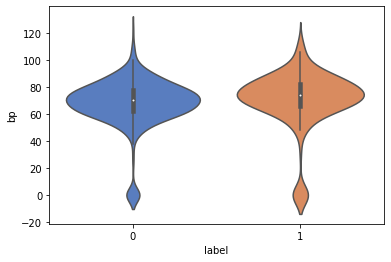

In [8]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='label', y='bp', data=pima, palette='muted' , split=True)

In [9]:
df1 = pima.loc[pima['label'] == 1]
df2 = pima.loc[pima['label'] == 0]
df1 = df1.replace({'bp':0}, np.median(df1['bp']))
df2 = df2.replace({'bp':0}, np.median(df2['bp']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

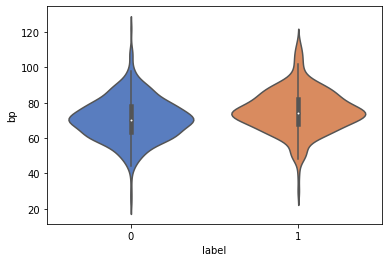

In [10]:
ax = sns.violinplot(x='label', y='bp', data=dataset, palette='muted' , split=True)

It can be implied that diabetics seem to have a higher blood pressure than the non-diabetics. The bottom tail of the violins indicates the zero values we need to replace. We will replace the zeros for 1 with median of 1 and same for 0

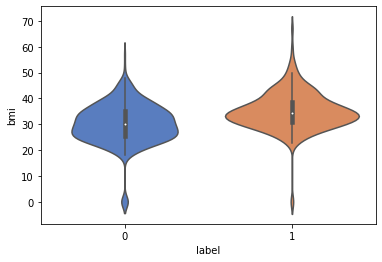

In [11]:
ax = sns.violinplot(x='label', y='bmi', data=pima, palette='muted' , split=True)

In [12]:
df1 = pima.loc[pima['label'] == 1]
df2 = pima.loc[pima['label'] == 0]
df1 = df1.replace({'bmi':0}, np.median(df1['bmi']))
df2 = df2.replace({'bmi':0}, np.median(df2['bmi']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

In [13]:
dataset.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


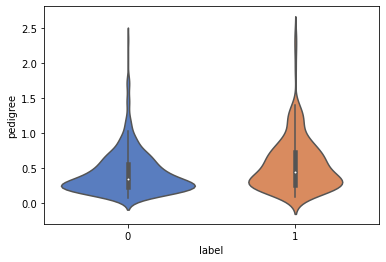

In [14]:
ax = sns.violinplot(x='label', y='pedigree', data=pima, palette='muted' , split=True)

In [15]:
df1 = pima.loc[pima['label'] == 1]
df2 = pima.loc[pima['label'] == 0]
df1 = df1.replace({'pedigree':0}, np.median(df1['pedigree']))
df2 = df2.replace({'pedigree':0}, np.median(df2['pedigree']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

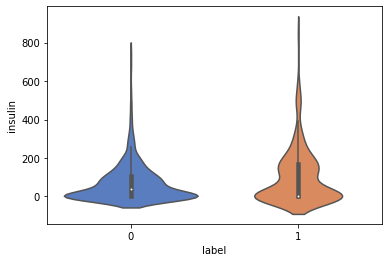

In [16]:
ax = sns.violinplot(x='label', y='insulin', data=pima, palette='muted' , split=True)

In [17]:
df1 = pima.loc[pima['label'] == 1]
df2 = pima.loc[pima['label'] == 0]
df1 = df1.replace({'insulin':0}, np.median(df1['insulin']))
df2 = df2.replace({'insulin':0}, np.median(df2['insulin']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

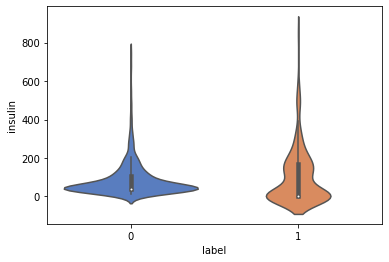

In [18]:
ax = sns.violinplot(x='label', y='insulin', data=dataset, palette='muted' , split=True)

In [19]:
df1 = pima.loc[pima['label'] == 1]
df2 = pima.loc[pima['label'] == 0]
df1 = df1.replace({'glucose':0}, np.median(df1['glucose']))
df2 = df2.replace({'glucose':0}, np.median(df2['glucose']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

Our Dependent Variable ‘Label’ takes Boolean values 0 and 1. 0 indicates non-diabetic and 1 indicates diabetic. To examine the occurrence, we use a simple bar plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


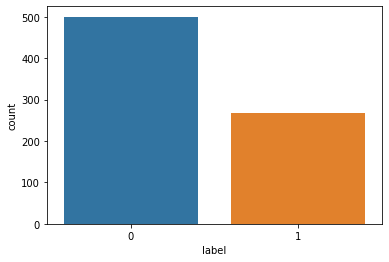

In [20]:
sns.countplot(dataset.label)
plt.show()

#### The imbalance in the data can be clearly seen with 0 (Non-Diabetic) being the modal class.

### Checking for Multi collinearity

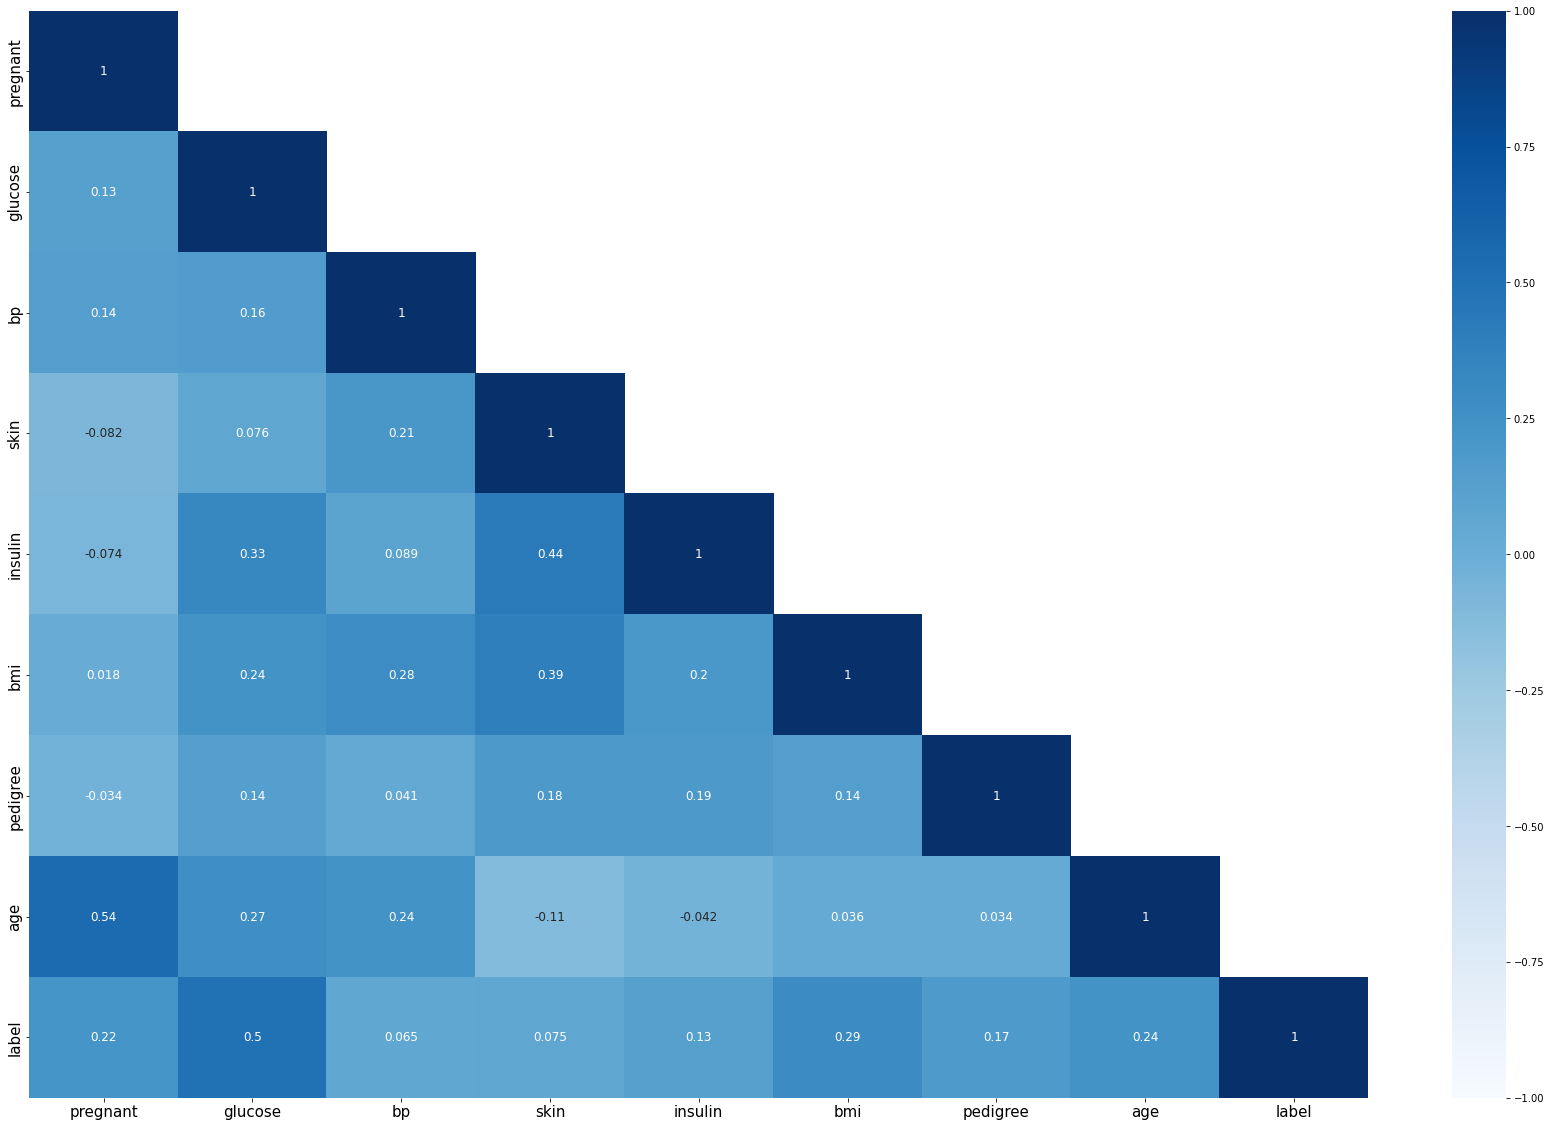

In [21]:
corrmat=dataset.corr()
plt.figure(figsize = (30,20))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

### Treating Outliers and Non-Normality

Outliers are extreme values existing in the dataset. Outliers do not affect a tree-based algorithm. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution with mean 0.

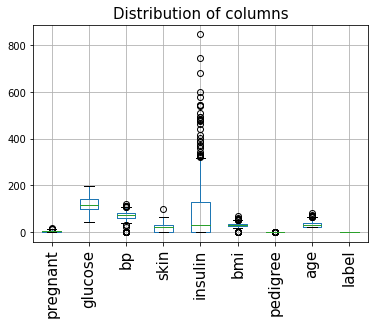

In [22]:
dataset.boxplot()

plt.title('Distribution of columns', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

In [23]:
#Splitting the data into dependent and independent variables
Y = dataset.label
x = dataset.drop('label', axis = 1)
columns = x.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X_scale = pd.DataFrame(X, columns = columns)

## Splitting the dataset into Training and Test data

In [24]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, test_size = 0.15, random_state = 45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


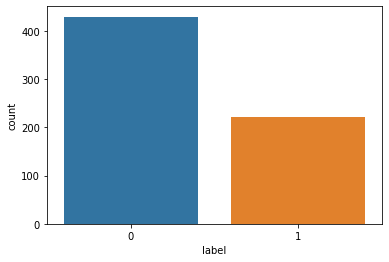

In [25]:
sns.countplot(y_train)
plt.show()

In [26]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [27]:
np.bincount(y_train)

array([430, 430])

In [28]:
def get_test_report(model):
    
    # return the p  erformace measures on test set
    return(classification_report(y_test, y_pred))

In [29]:
def plot_confusion_matrix(model):
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [30]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Diabetese Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [31]:
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [65]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    
    global score_card

    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [67]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]
y_pred = logreg.predict(x_test)

In [68]:
test_report = get_test_report(logreg)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        70
           1       0.67      0.74      0.70        46

    accuracy                           0.75       116
   macro avg       0.74      0.75      0.74       116
weighted avg       0.76      0.75      0.75       116



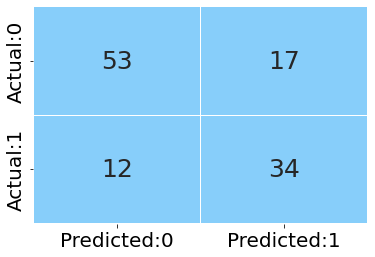

In [69]:
plot_confusion_matrix(logreg)

In [70]:
kappa_value = kappa_score(logreg)

# print the kappa value
print(kappa_value)


0.4871951219512195


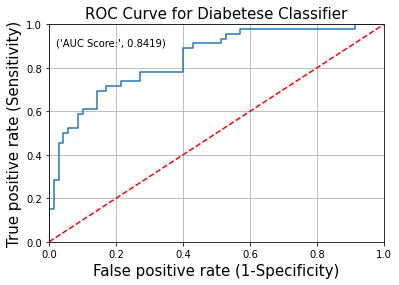

In [71]:
plot_roc(logreg)

In [72]:
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841925,0.666667,0.73913,0.75,0.487195,0.701031


# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of Random Forest on test set: 0.75


In [74]:
y_pred_prob = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)

In [75]:
test_report = get_test_report(model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        70
           1       0.67      0.72      0.69        46

    accuracy                           0.75       116
   macro avg       0.74      0.74      0.74       116
weighted avg       0.75      0.75      0.75       116



In [76]:
kappa_value = kappa_score(model)

# print the kappa value
print(kappa_value)


0.4834152334152334


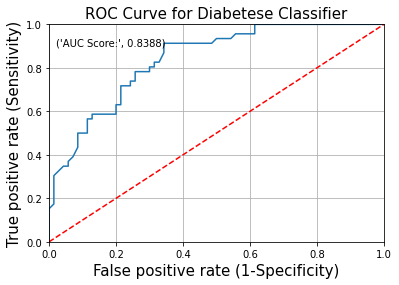

In [77]:
plot_roc(model)

In [78]:
update_score_card(model_name = 'Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841925,0.666667,0.739130,0.75,0.487195,0.701031
1,Random Forest,0.838820,0.673469,0.717391,0.75,0.483415,0.694737


# Decision Tree

In [79]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(x_train, y_train)

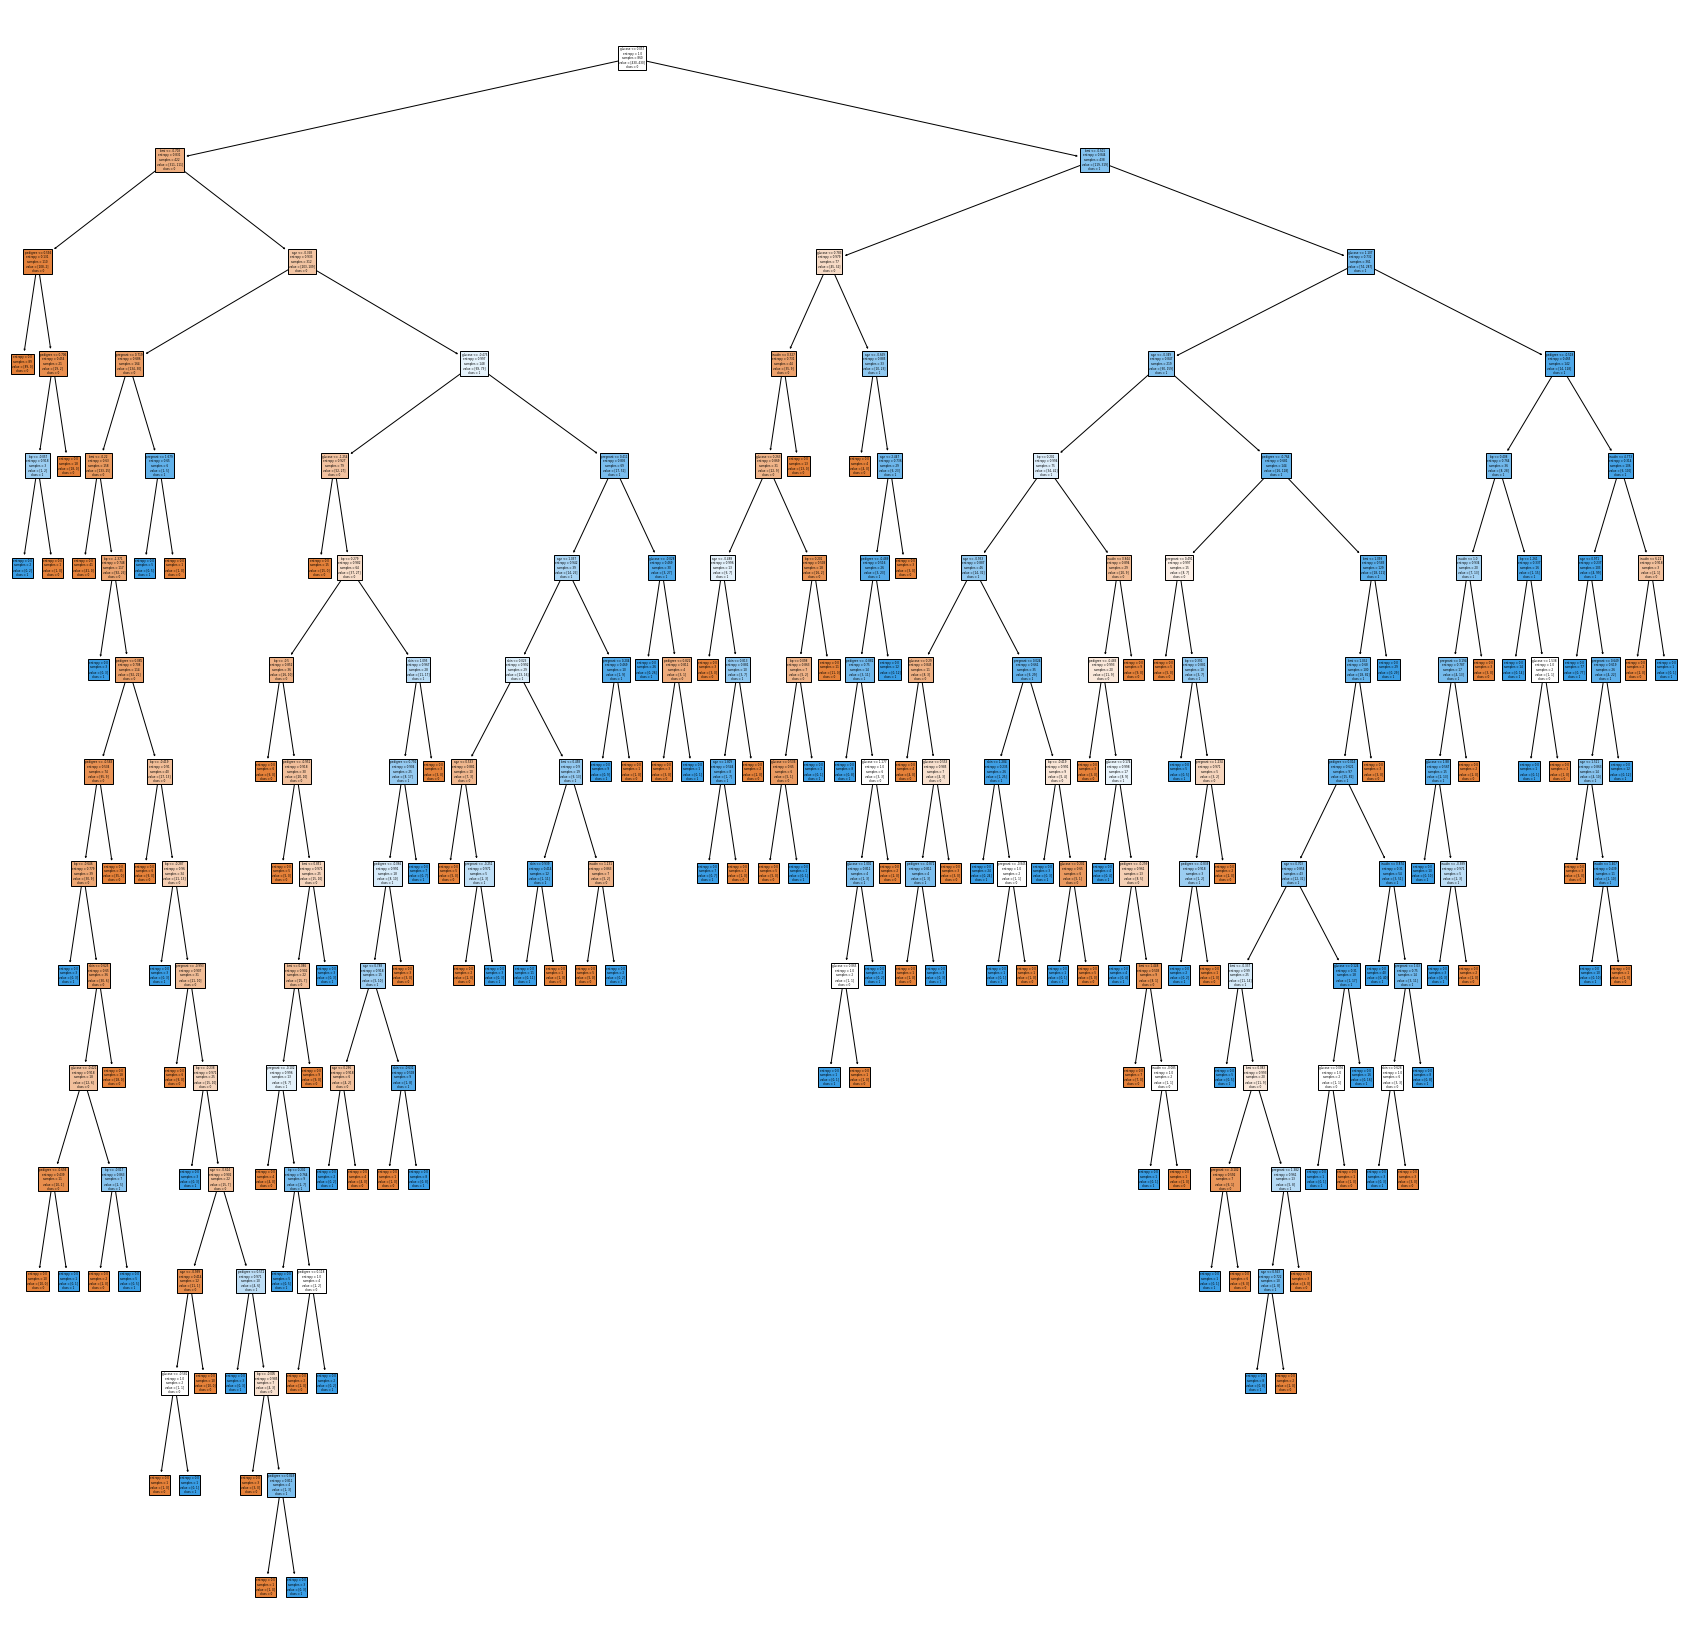

In [80]:
lables = x_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [81]:
y_pred_prob = decision_tree_model.predict_proba(x_test)[:,1]
y_pred = decision_tree_model.predict(x_test)


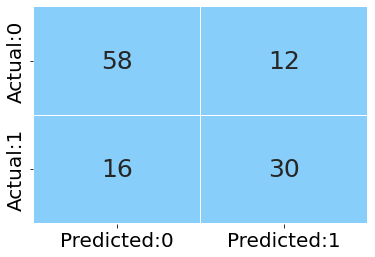

In [82]:
plot_confusion_matrix(decision_tree_model)

In [83]:
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        70
           1       0.71      0.65      0.68        46

    accuracy                           0.76       116
   macro avg       0.75      0.74      0.74       116
weighted avg       0.76      0.76      0.76       116



In [84]:
kappa_value = kappa_score(decision_tree_model)

# print the kappa value
print(kappa_value)

0.4880201765447667


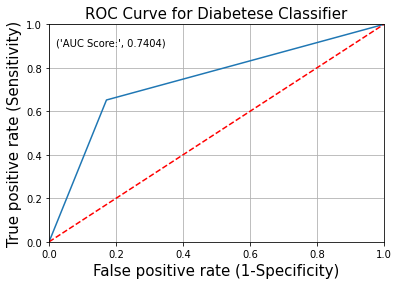

In [85]:
plot_roc(decision_tree_model)

In [86]:
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841925,0.666667,0.739130,0.750000,0.487195,0.701031
1,Random Forest,0.838820,0.673469,0.717391,0.750000,0.483415,0.694737
2,Decision Tree,0.740373,0.714286,0.652174,0.758621,0.488020,0.681818


# SVM

In [87]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.73


In [88]:
test_report = get_test_report(classifier_rbf)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        70
           1       0.65      0.72      0.68        46

    accuracy                           0.73       116
   macro avg       0.72      0.73      0.73       116
weighted avg       0.74      0.73      0.73       116



In [90]:

y_pred = classifier_rbf.predict(x_test)

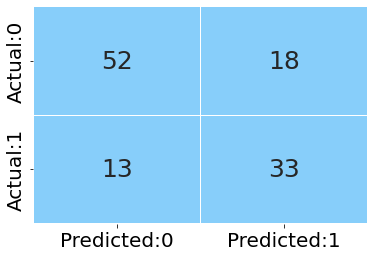

In [91]:
plot_confusion_matrix(classifier_rbf)

In [92]:
kappa_value = kappa_score(classifier_rbf)

# print the kappa value
print(kappa_value)


0.4518292682926829


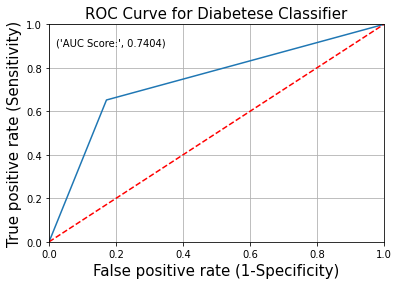

In [93]:
plot_roc(classifier_rbf)

In [94]:
update_score_card(model_name = 'SVM')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841925,0.666667,0.739130,0.750000,0.487195,0.701031
1,Random Forest,0.838820,0.673469,0.717391,0.750000,0.483415,0.694737
2,Decision Tree,0.740373,0.714286,0.652174,0.758621,0.488020,0.681818
3,SVM,0.740373,0.647059,0.717391,0.732759,0.451829,0.680412


We thus select the Random Forest Classifier as the right model due to high accuracy, precision and recall score. One reason why Random Forest Classifier showed an improved performance was because of the presence of outliers. As mentioned before, since Random Forest is not a a distance based algorithm, it is not much affected by outliers, whereas distance based algorithm such as Logistic Regression and Support Vector showed a lower performance.